In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/aci_b.csv")

In [ ]:
# Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset before soup:")
print(label_counts)


Label distribution in the sampled dataset before soup:
Label
1    127022
0     17407
Name: count, dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'], dtype='object')


In [ ]:
df.drop(columns=categorical_cols, inplace=True)


In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [ ]:
# Count rows with at least one missing value
missing_rows_count = df.isnull().any(axis=1).sum()
print(missing_rows_count)

0


In [ ]:


# Check for missing values in each column
missing_columns = df.isnull().sum()



In [ ]:
df=df.fillna(df.mean())  # Mean

In [ ]:
import numpy as np

In [ ]:

def check_infinite_values(df):
    infinite_values = df.isin([np.inf, -np.inf]).sum()
    total_infinite = infinite_values.sum()

    if total_infinite > 0:
        print("Infinite values found in the dataset:")
        print(infinite_values[infinite_values > 0])
    else:
        print("No infinite values found in the dataset.")


check_infinite_values(df)

No infinite values found in the dataset.


In [ ]:
import numpy as np
import pandas as pd



# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")




 No missing values remain after preprocessing.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

# Separating features and label
features = df.drop(columns=["Label"])  # Drop the label column
label = df["Label"]  # Store the label separately

# Fit and transform the features
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the label column back
df_scaled = pd.concat([features_scaled, label], axis=1)

print("Data after Standard Scaling (Label column excluded from scaling):")
print(df_scaled.head())


Data after Standard Scaling (Label column excluded from scaling):
   Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0 -0.880570  0.078354       0.0      -0.279770          -0.02973   
1  0.463289  1.778823       0.0      -0.279574          -0.02973   
2  0.463289  0.410869       0.0      -0.279541          -0.02973   
3  0.481591  0.917050       0.0      -0.279807          -0.02973   
4  0.463289  0.906951       0.0      -0.280049          -0.02973   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0          -0.028572                   -0.011126                   -0.022111   
1          -0.028572                   -0.011126                   -0.022111   
2          -0.028572                   -0.011126                   -0.022111   
3          -0.028572                   -0.011126                   -0.022111   
4          -0.028572                   -0.011123                   -0.022111   

   Fwd Packet Length Max  Fwd Packet Length 

In [ ]:
df=df_scaled

In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [ ]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
1    127022
0     17407
Name: count, dtype: int64


In [ ]:
check_infinite_values(df)

No infinite values found in the dataset.


In [ ]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [ ]:
# Save the new dataset
df.to_csv("binf_aci.csv", index=False)

# BALANCING USING SMOTE

In [ ]:
df=pd.read_csv("/content/binf_aci.csv")

In [ ]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
1    127022
0     17407
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-23-422a60dd3e90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


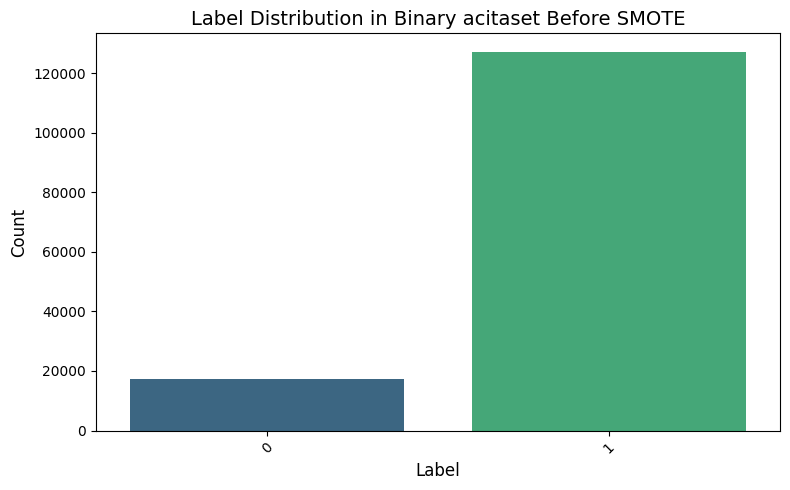

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Binary acitaset Before SMOTE", fontsize=14)
plt.xticks(rotation=45)

# Save figure
plt.tight_layout()
plt.savefig('binary_aci_label_distribution_before_smote.png', dpi=800)

# Show plot
plt.show()


Classification Report (Before SMOTE):
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      3487
           1       0.98      0.97      0.97     25399

    accuracy                           0.95     28886
   macro avg       0.88      0.90      0.89     28886
weighted avg       0.95      0.95      0.95     28886

Accuracy: 0.9513
Precision: 0.9529
Recall: 0.9513
F1-score: 0.9520


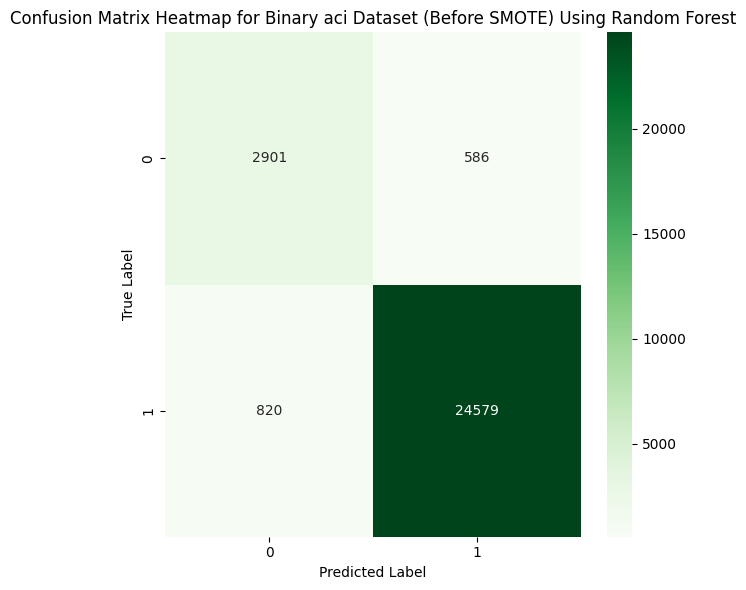

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest) on imbalanced data (before SMOTE)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print classification report
print("Classification Report (Before SMOTE):\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Binary aci Dataset (Before SMOTE) Using Random Forest")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('binary_aci_confusion_matrix_random_forest_before_smote.png', dpi=800)

# Show plot
plt.show()


Classification Report (After SMOTE):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     25451
           1       0.99      0.95      0.97     25358

    accuracy                           0.97     50809
   macro avg       0.97      0.97      0.97     50809
weighted avg       0.97      0.97      0.97     50809

Accuracy: 0.9724
Precision: 0.9734
Recall: 0.9724
F1-score: 0.9724


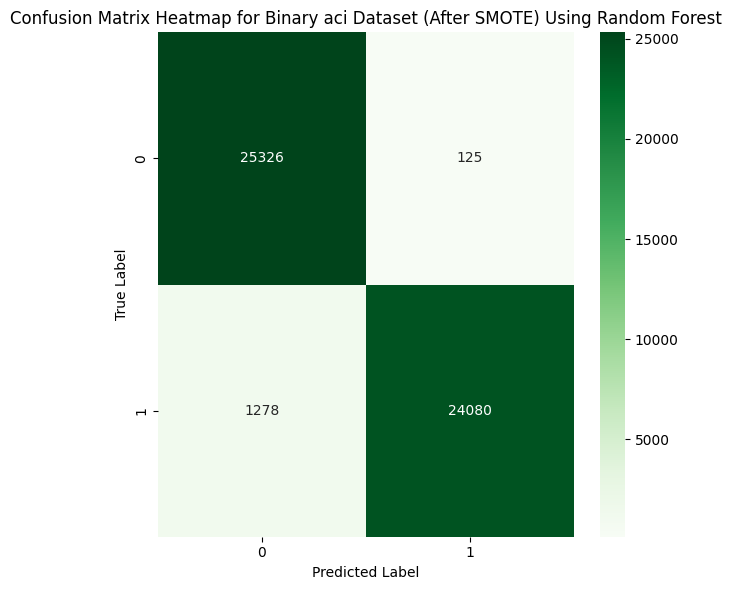

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


df = pd.read_csv("/content/binf_aci.csv")

# Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

#  Save the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df["Label"] = y_balanced
balanced_df.to_csv("bal_bin_aci.csv", index=False)
#print("Balanced dataset saved as 'bal_bin_aci.csv'.")

# Train-test split (after SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

#  Train a classifier (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#  Make predictions
y_pred = clf.predict(X_test)

#  Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#  Print classification report
print("Classification Report (After SMOTE):\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#  Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Binary aci Dataset (After SMOTE) Using Random Forest")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('binary_aci_confusion_matrix_random_forest_after_smote.png', dpi=800)

# Show plot
plt.show()


In [ ]:
df=pd.read_csv("/content/bal_bin_aci.csv")

In [ ]:
# Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset after SMOTE:")
print(label_counts)


Label distribution in the sampled dataset after SMOTE:
Label
1    127022
0    127022
Name: count, dtype: int64


<ipython-input-28-3d124a7ce3e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


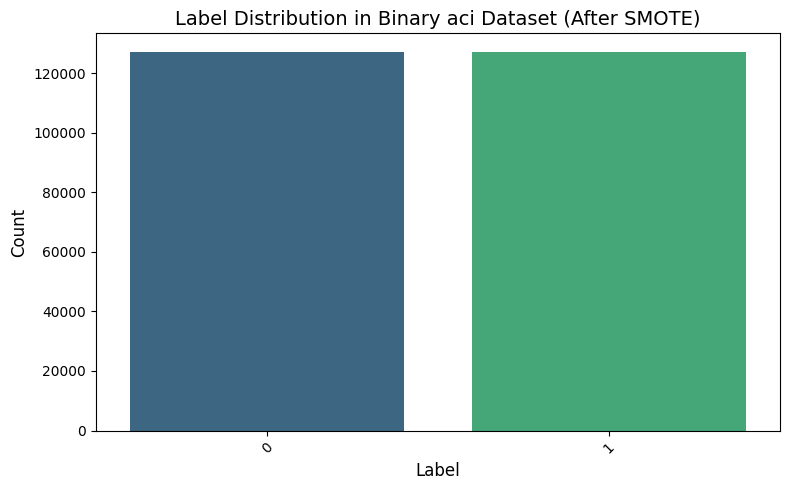

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Binary aci Dataset (After SMOTE)", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()

# Save the figure
plt.savefig('binary_aci_label_distribution_after_smote.png', dpi=800)

# Show plot
plt.show()


# **Filtering mechanism**

# Correlation-Based Filtering

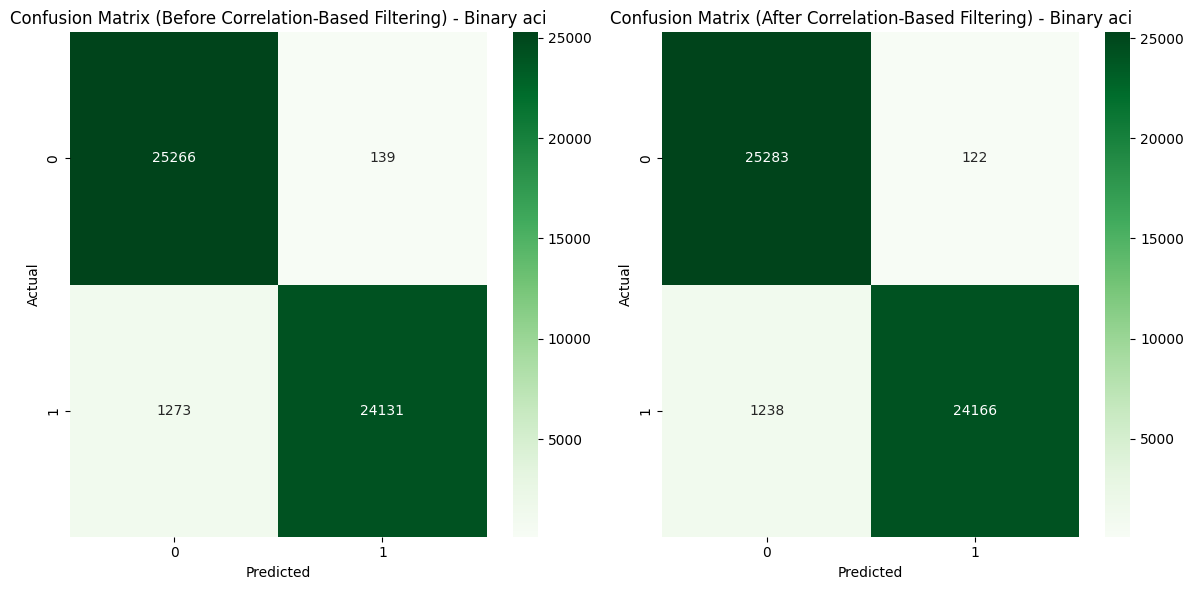

<Figure size 800x600 with 0 Axes>

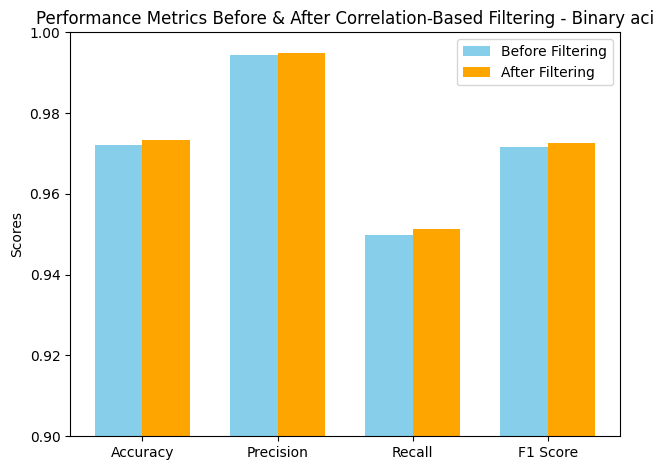

Before Filtering - Accuracy: 0.9722, Precision: 0.9943, Recall: 0.9499, F1 Score: 0.9716
After Filtering - Accuracy: 0.9732, Precision: 0.9950, Recall: 0.9513, F1 Score: 0.9726


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize dictionary to store classification results
classification_results = {}


df = pd.read_csv("/content/bal_bin_aci.csv")

# Check dataset is binary
assert df['Label'].nunique() == 2, "Error: Dataset is not binary!"

# Define features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Copy original feature names
original_feature_names = X.columns.tolist()

# Correlation-based Filtering
correlation_threshold = 0.9
correlation_matrix = X.corr()

# Identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
drop_columns = [col for col in upper_triangle.columns if any(upper_triangle[col].abs() > correlation_threshold)]

# Create filtered dataset but keep feature names intact
X_filtered = X.copy()
X_filtered.loc[:, drop_columns] = 0

# Ensure feature names are unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtcorr_binary_aci.csv", index=False)

# Train-Test Split
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

#  Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train and predict before filtering
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict after filtering
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute Metrics (Binary classification)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before)
recall_before = recall_score(y_test_before, y_pred_before)
f1_before = f1_score(y_test_before, y_pred_before)

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after)
recall_after = recall_score(y_test_after, y_pred_after)
f1_after = f1_score(y_test_after, y_pred_after)

# Confusion Matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Labels for binary classification
binary_labels = [str(label) for label in np.unique(y)]

# Plot Confusion Matrices
plt.figure(figsize=(12, 6))

# Before filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=binary_labels, yticklabels=binary_labels)
plt.title('Confusion Matrix (Before Correlation-Based Filtering) - Binary aci')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# After filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=binary_labels, yticklabels=binary_labels)
plt.title('Confusion Matrix (After Correlation-Based Filtering) - Binary aci')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_binary_aci_correlation_filtering.png", dpi=800)
plt.show()

# Performance Comparison Graph (Zoomed In Y-axis 0.9 to 1.0)
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Correlation-Based Filtering - Binary aci')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.9, 1.0)  # Zooming in on Y-axis
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_binary_aci_correlation_filtering_zoomed.png", dpi=800)
plt.show()


# Store and Print Classification Results
classification_results['Correlation-Based Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Save results to CSV
results_df = pd.DataFrame(classification_results).T  # Transpose for better formatting
results_df.to_csv("classification_results_binary_aci_correlation_filtering.csv", index=True)

# Print results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# Variance threshold filtering

Number of features before filtering: 79
Number of features after filtering: 73


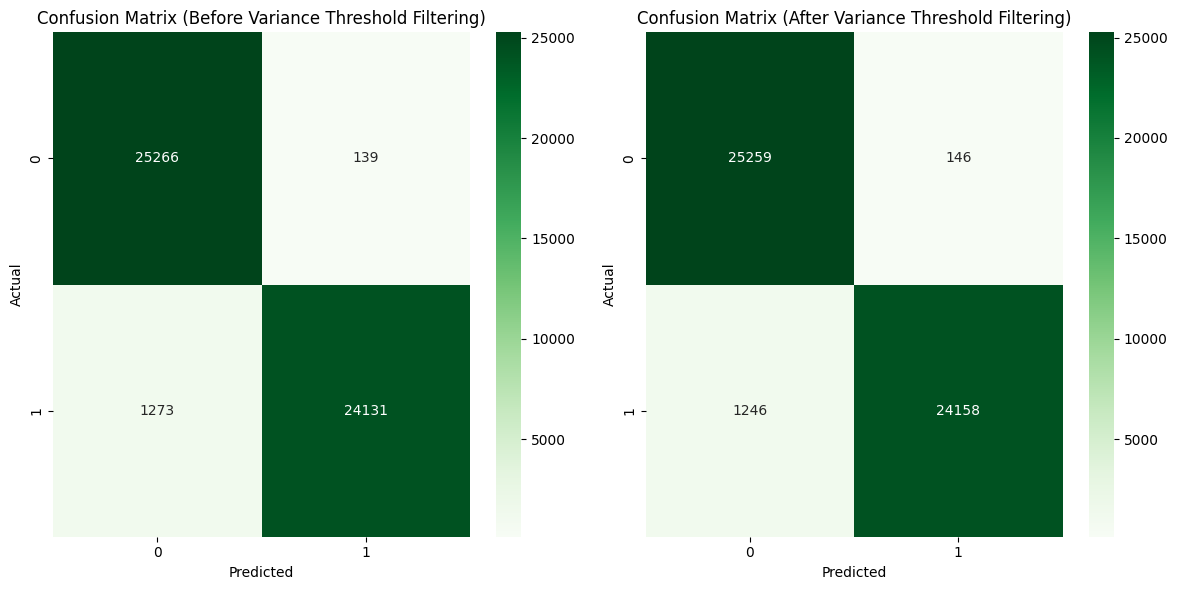

<Figure size 800x600 with 0 Axes>

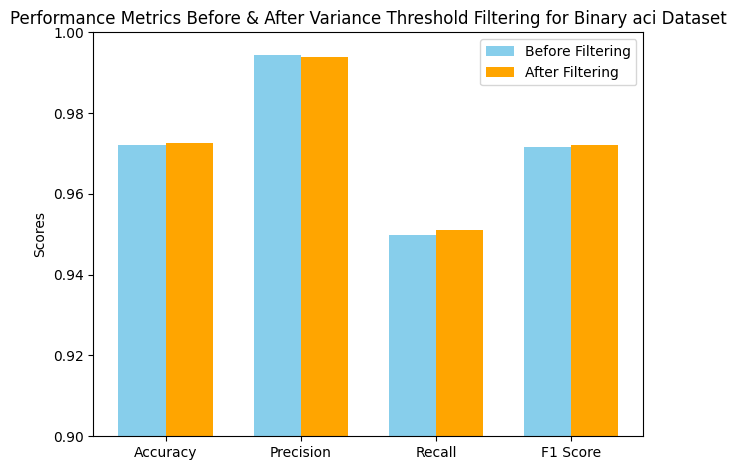

Before Filtering - Accuracy: 0.9722, Precision: 0.9943, Recall: 0.9499, F1 Score: 0.9716
After Filtering  - Accuracy: 0.9726, Precision: 0.9940, Recall: 0.9510, F1 Score: 0.9720


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold


df = pd.read_csv("/content/bal_bin_aci.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Variance Threshold Filtering
variance_threshold = 0.01  # Set the threshold for variance
selector = VarianceThreshold(threshold=variance_threshold)
X_after = selector.fit_transform(X)
X_filtered = pd.DataFrame(X_after, columns=X.columns[selector.get_support()])

# Show number of features before and after filtering
print(f"Number of features before filtering: {X.shape[1]}")
print(f"Number of features after filtering: {X_filtered.shape[1]}")

# Save filtered dataset
filtered_df = pd.concat([X_filtered, y], axis=1)
filtered_df.to_csv("/content/varthresh_binary_aci.csv", index=False)

# Train-test split
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='binary')
recall_before = recall_score(y_test_before, y_pred_before, average='binary')
f1_before = f1_score(y_test_before, y_pred_before, average='binary')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='binary')
recall_after = recall_score(y_test_after, y_pred_after, average='binary')
f1_after = f1_score(y_test_after, y_pred_after, average='binary')

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot Confusion Matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Before Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (After Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save the confusion matrix figure
plt.savefig("/content/confusion_matrix_binary_aci_varthresh.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Variance Threshold Filtering for Binary aci Dataset')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.9, 1.0)  # Zoom in on the y-axis
ax.legend()

plt.tight_layout()

# Save the performance comparison figure
plt.savefig("/content/performance_comparison_binary_aci_varthresh.png", dpi=800)
plt.show()

# Store and Print Classification Results
classification_results['Variance Threshold Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Save results to CSV
results_df = pd.DataFrame(classification_results).T
results_df.to_csv("/content/classification_results_binary_aci_varthresh.csv", index=True)

# Print metrics for quick check
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering  - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")



# mutual information based filtering

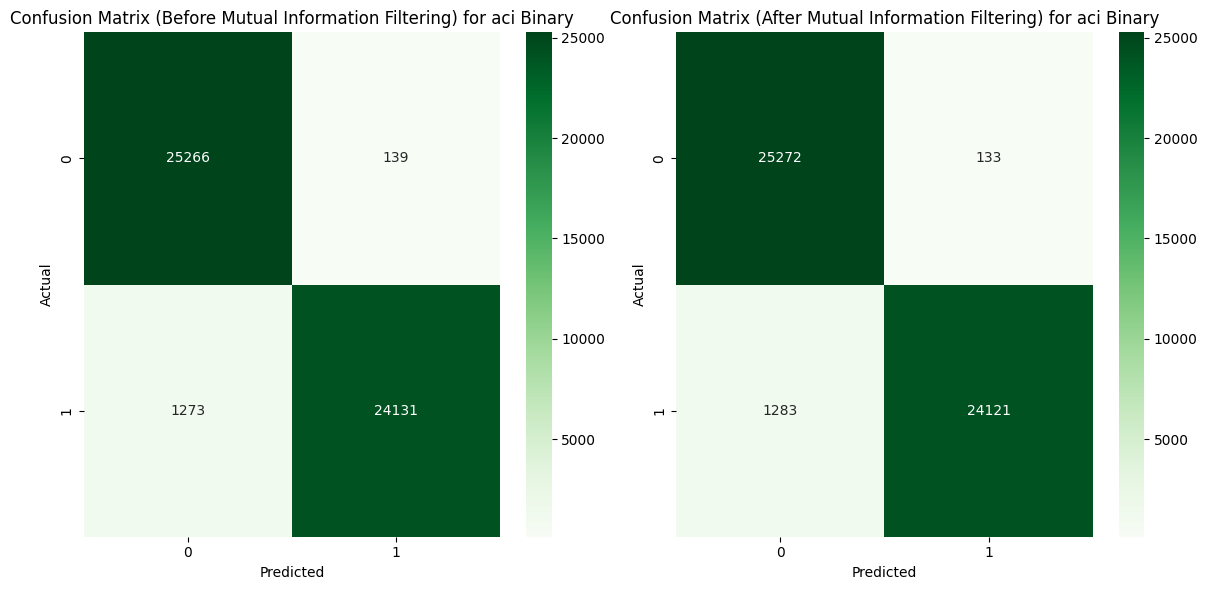

<Figure size 800x600 with 0 Axes>

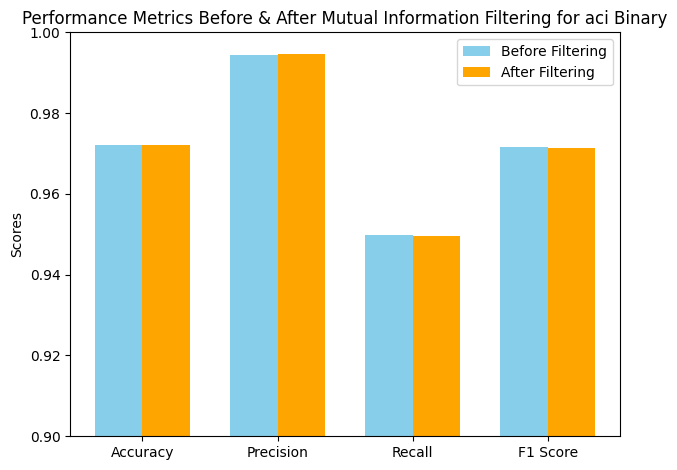

Before Filtering - Accuracy: 0.9722, Precision: 0.9943, Recall: 0.9499, F1 Score: 0.9716
After Filtering  - Accuracy: 0.9721, Precision: 0.9945, Recall: 0.9495, F1 Score: 0.9715


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/bal_bin_aci.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Copy original feature names
original_feature_names = X.columns.tolist()

# Mutual Information Filtering
mi = mutual_info_classif(X, y)
mi_threshold = 0.01
selected_features = X.columns[mi > mi_threshold]

# Create filtered dataset but keep feature names intact (set dropped features to 0)
X_filtered = X.copy()
X_filtered.loc[:, ~X_filtered.columns.isin(selected_features)] = 0

# Ensure feature names remain unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtmutualinfo_binary_aci.csv", index=False)

# Train-test split (stratify to maintain class balance)
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute metrics for binary classification
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='binary')
recall_before = recall_score(y_test_before, y_pred_before, average='binary')
f1_before = f1_score(y_test_before, y_pred_before, average='binary')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='binary')
recall_after = recall_score(y_test_after, y_pred_after, average='binary')
f1_after = f1_score(y_test_after, y_pred_after, average='binary')

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Before Mutual Information Filtering) for aci Binary')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (After Mutual Information Filtering) for aci Binary')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save confusion matrix figure
plt.savefig("confusion_matrix_binary_aci_mutual_info_filtering.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Mutual Information Filtering for aci Binary')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.9, 1.0)  # Zoomed y-axis to highlight metric differences
ax.legend()

plt.tight_layout()

# Save performance comparison figure
plt.savefig("performance_comparison_binary_aci_mutual_info_filtering.png", dpi=800)
plt.show()

# Store and Print Classification Results
classification_results['Mutual Info Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Save results to CSV
results_df = pd.DataFrame(classification_results).T
results_df.to_csv("classification_results_binary_aci_mutual_info_filtering.csv", index=True)

# Print metrics for quick check
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering  - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# comparison

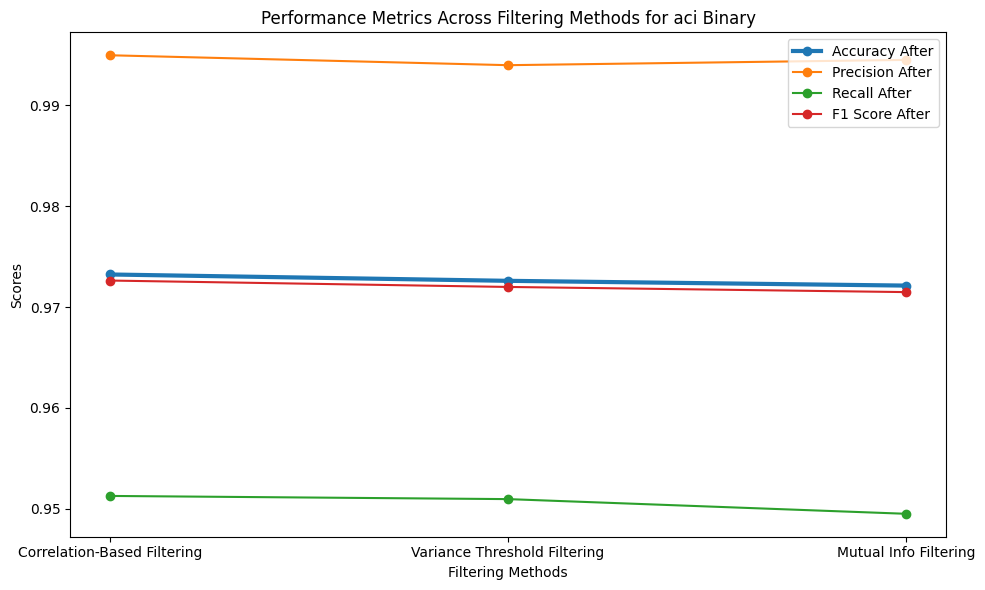

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy After', 'Precision After', 'Recall After', 'F1 Score After']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results
for method in classification_results:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results[method][metric])

# Create a line plot for each metric
plt.figure(figsize=(10, 6))

# Plotting lines for each metric (Accuracy, Precision, Recall, F1 Score)
for metric in metrics_names:
    if metric == 'Accuracy After':
        # Make the accuracy line thicker
        plt.plot(list(classification_results.keys()), metrics_values[metric], label=metric, marker='o', linewidth=3)
    else:
        plt.plot(list(classification_results.keys()), metrics_values[metric], label=metric, marker='o')

# Labels and title
plt.xlabel('Filtering Methods')
plt.ylabel('Scores')
plt.title('Performance Metrics Across Filtering Methods for aci Binary')

# Displaying legend
plt.legend()

# Layout adjustment
plt.tight_layout()

# Save the plot
plt.savefig('performance_metrics_binary_aci_filtering.png', dpi=800)

# Show the plot
plt.show()


# **univariate feature selction**

# select K best

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  7 10 11 14 15 20 22 23 25 26 27 28 30 31 33 35 36 37 38 42 43 44
 49 50 52 54 55 56 57 58 59 61 66 69 73 74 75 77 78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Number of features before feature selection: 79
Number of features after feature selection (SelectKBest): 30


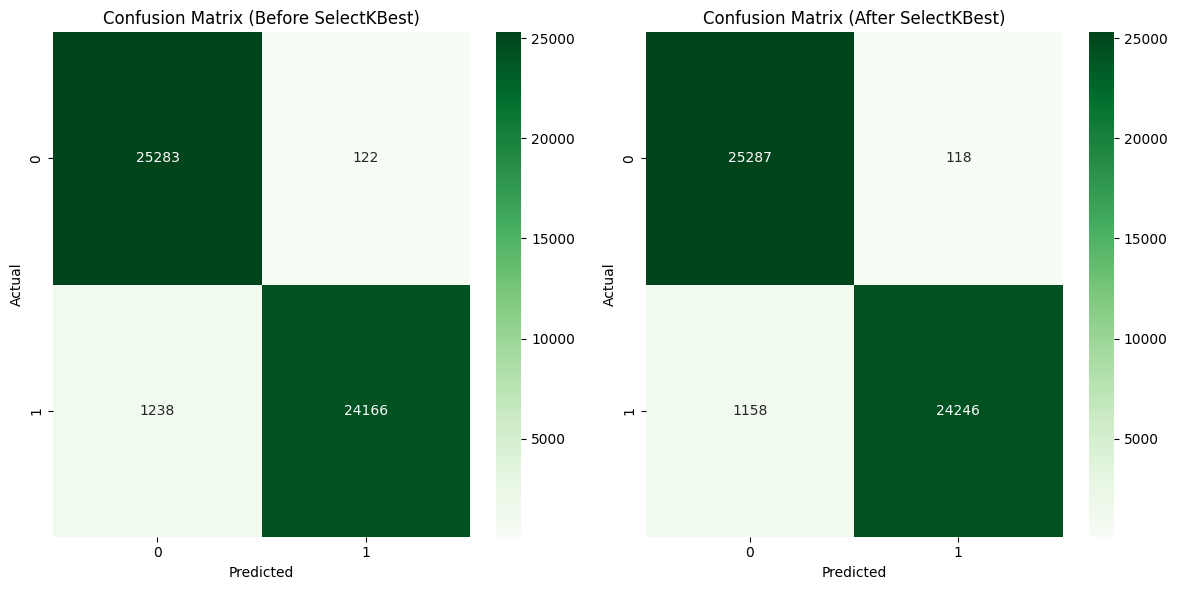

<Figure size 800x600 with 0 Axes>

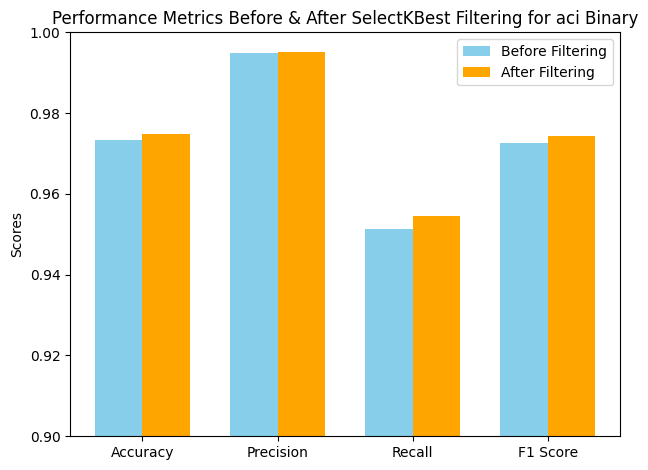

Before Filtering - Accuracy: 0.9732, Precision: 0.9950, Recall: 0.9513, F1 Score: 0.9726
After Filtering  - Accuracy: 0.9749, Precision: 0.9952, Recall: 0.9544, F1 Score: 0.9744


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store classification results after filtering for later comparison
classification_results1 = {}


df = pd.read_csv("/content/filtcorr_binary_aci.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# SelectKBest Feature Selection
k = 30  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_after = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Show the number of features before and after
print(f"Number of features before feature selection: {X_before.shape[1]}")
print(f"Number of features after feature selection (SelectKBest): {X_after.shape[1]}")

# Create a new dataset after
X_after_df = pd.DataFrame(X_after, columns=selected_features)
df_after_filtering = pd.concat([X_after_df, y], axis=1)

df_after_filtering.to_csv("binary_featk_aci.csv", index=False)

# Split the dataset
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)

# Training on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Training on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='binary')
recall_before = recall_score(y_test_before, y_pred_before, average='binary')
f1_before = f1_score(y_test_before, y_pred_before, average='binary')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='binary')
recall_after = recall_score(y_test_after, y_pred_after, average='binary')
f1_after = f1_score(y_test_after, y_pred_after, average='binary')

classification_results1['SelectKBest'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Before SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (After SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_aci_binary_selectkbest.png", dpi=800)
plt.show()

# Bar chart comparing performance metrics
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After SelectKBest Filtering for aci Binary')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.9, 1.0)  # Zoomed-in y-axis to better show metric differences
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_binary_aci_selectkbest.png", dpi=800)
plt.show()

# Save Classification Results
classification_results1['SelectKBest'].update({
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before
})

results_df = pd.DataFrame(classification_results1).T
results_df.to_csv("classification_results_binary_aci_selectkbest.csv", index=True)

# Optional: Print results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering  - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")




# mutual information

Number of features before filtering: 79
Number of features after filtering (Mutual Information): 30


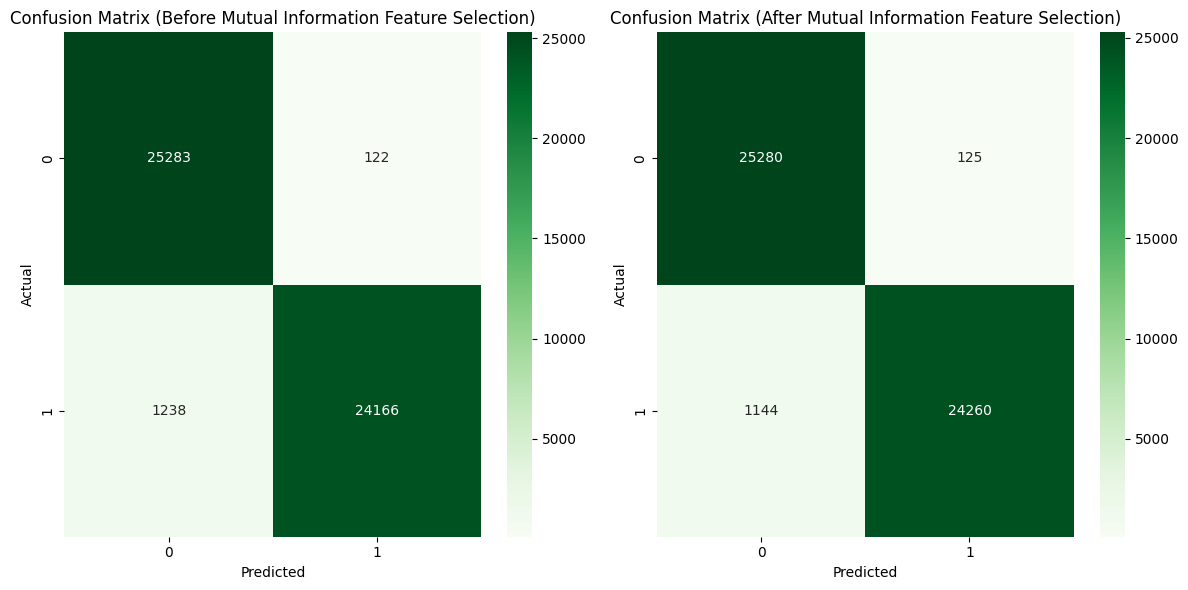

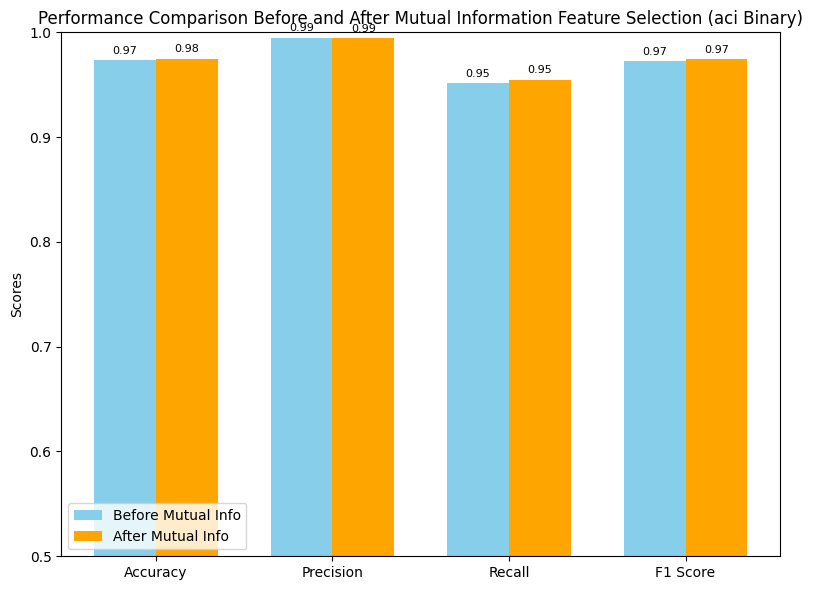

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_csv("/content/filtcorr_binary_aci.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# Compute Mutual Information between features and target
mutual_info_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to store features and MI scores
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_scores
}).sort_values(by='Mutual Information', ascending=False)

# Select top 'k' features
k = 30
top_k_features = mutual_info_df['Feature'].head(k).values
X_after = X[top_k_features]

# Show number of features
print(f"Number of features before filtering: {X_before.shape[1]}")
print(f"Number of features after filtering (Mutual Information): {X_after.shape[1]}")

# Save filtered dataset
df_after_filtering = pd.concat([X_after, y], axis=1)
df_after_filtering.to_csv("binary_featm_aci.csv", index=False)

# Split datasets
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)

# Train and predict on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='binary')
recall_before = recall_score(y_test_before, y_pred_before, average='binary')
f1_before = f1_score(y_test_before, y_pred_before, average='binary')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='binary')
recall_after = recall_score(y_test_after, y_pred_after, average='binary')
f1_after = f1_score(y_test_after, y_pred_after, average='binary')

# Store results
classification_results1['Mutual Information'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Confusion Matrix Before Filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Before Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix After Filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (After Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrices_aci_binary_mutual_information.png", dpi=800)
plt.show()

# Plot performance comparison with zoomed-in Y-axis
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, metrics_before, width, label='Before Mutual Info', color='skyblue')
rects2 = ax.bar(x + width/2, metrics_after, width, label='After Mutual Info', color='orange')

# Add value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(rects1)
add_labels(rects2)

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison Before and After Mutual Information Feature Selection (aci Binary)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.5, 1.0)  # Zoom in Y-axis
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_aci_binary_mutual_information_labeled_zoomed.png", dpi=800)
plt.show()



# comparison

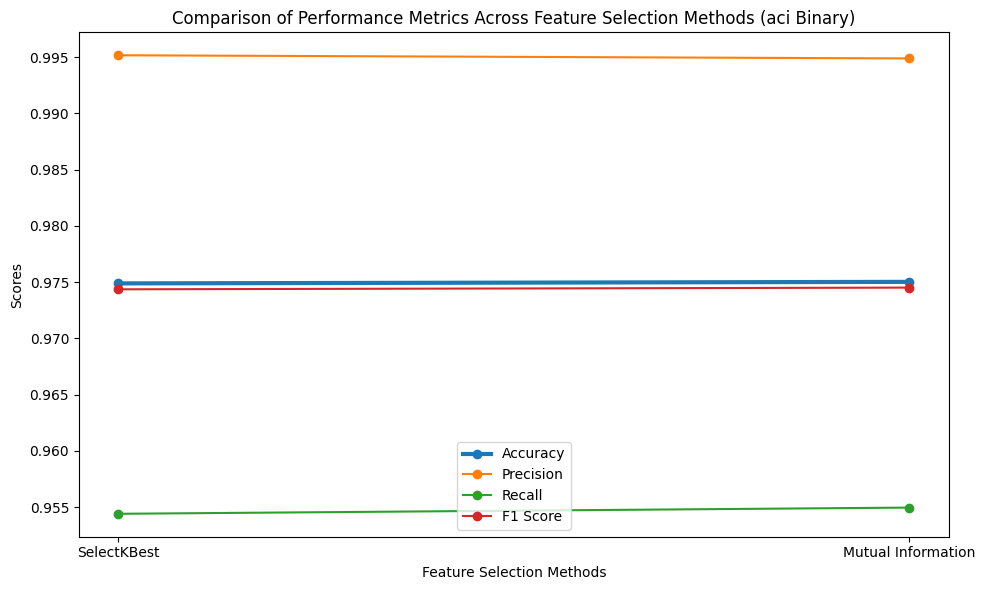

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results1
for method in classification_results1:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results1[method][metric])

# Create a line plot for each metric
plt.figure(figsize=(10, 6))

# Plotting lines for each metric (Accuracy, Precision, Recall, F1 Score)
for metric in metrics_names:
    if metric == 'Accuracy':
        plt.plot(list(classification_results1.keys()), metrics_values[metric], label=metric, marker='o', linewidth=3)  # Thicker line
    else:
        plt.plot(list(classification_results1.keys()), metrics_values[metric], label=metric, marker='o', linewidth=1.5)

# Labels and title
plt.xlabel('Feature Selection Methods')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics Across Feature Selection Methods (aci Binary)')

# Displaying legend
plt.legend()

# Tight layout and save the figure
plt.tight_layout()
plt.savefig("comparison_metrics_aci_binary_feature_selection.png", dpi=800)

# Show the plot
plt.show()
